In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [27]:
# B.
df = pd.read_csv("train.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


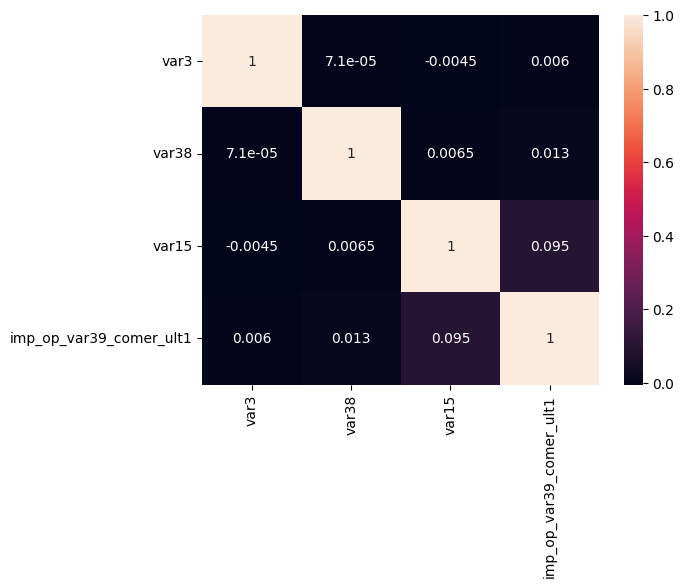

In [28]:
# C.
vars = ["var3", "var38", "var15", "imp_op_var39_comer_ult1"]
corr = df[vars].corr()
sns.heatmap(corr, annot=True)
plt.show()

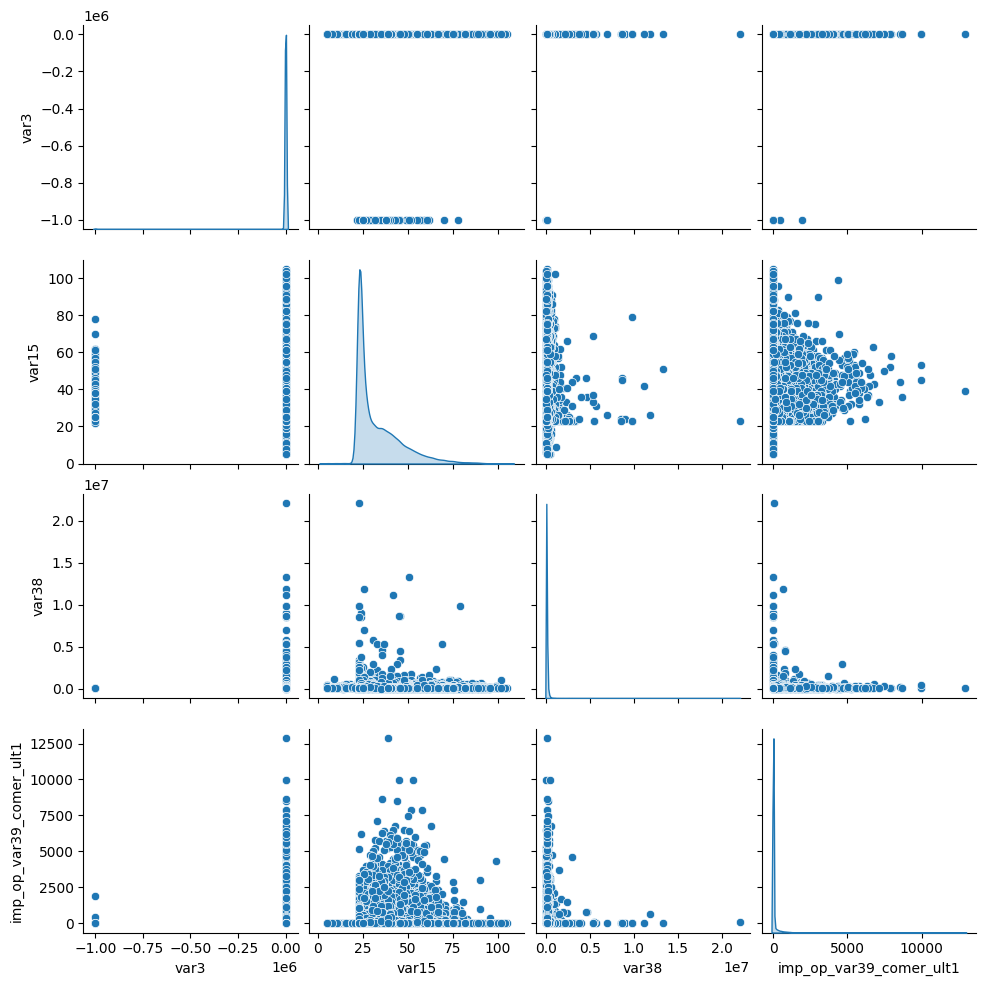

In [29]:
# D.
vars_to_check = ["var3", "var15", "var38", "imp_op_var39_comer_ult1"]
sns.pairplot(df[vars_to_check], diag_kind="kde")
plt.show()

From the pairplot, none of the variable combinations (var3, var15, var38, imp_op_var39_comer_ult1) show a strong linear relationship. Instead, we observe:
    . Discrete distributions (var3, var15) forming stripes.
    . Highly skewed variables (var38, imp_op_var39_comer_ult1) producing scattered, clustered points.
    . No straight-line patterns visible in any scatterplot.

In [30]:
# E.
print("Columns with missing values:",  df.isnull().sum().sum())

# imputation using average
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df[df.columns] = imputer.fit_transform(df)

# verify if missing values are handled
print("\nAfter Imputation, total missing values:", df.isnull().sum().sum())

Columns with missing values: 0

After Imputation, total missing values: 0


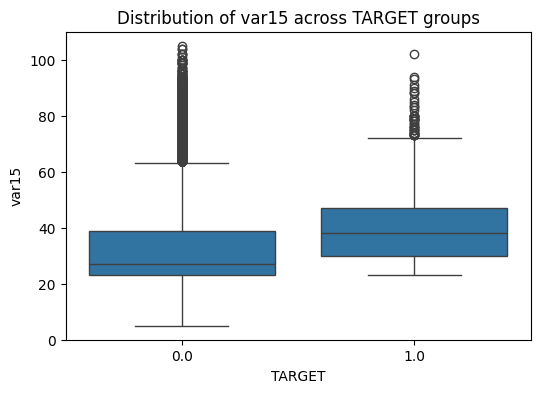

Mean var15 by TARGET:
TARGET
0.0    32.946406
1.0    39.680519
Name: var15, dtype: float64


In [31]:
# F.

# -----------------------------
# 1. var15 vs TARGET
# -----------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="TARGET", y="var15", data=df)
plt.title("Distribution of var15 across TARGET groups")
plt.show()

print("Mean var15 by TARGET:")
print(df.groupby("TARGET")["var15"].mean())

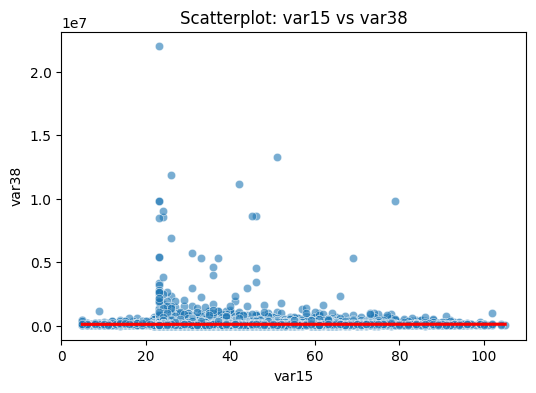

Correlation between var15 and var38: 0.006


In [32]:
# ----------------------------------------
# 2. Correlation between var15 and var38
# ----------------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="var15", y="var38", data=df, alpha=0.6)
sns.regplot(x="var15", y="var38", data=df, scatter=False, color="red")
plt.title("Scatterplot: var15 vs var38")
plt.show()

corr = df["var15"].corr(df["var38"])
print(f"Correlation between var15 and var38: {corr:.3f}")

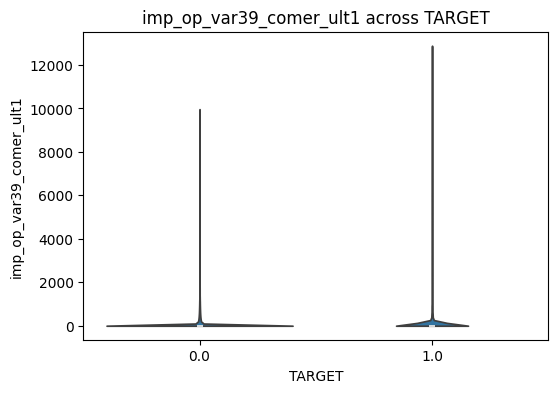

Mean imp_op_var39_comer_ult1 by TARGET:
TARGET
0.0    71.650026
1.0    89.670439
Name: imp_op_var39_comer_ult1, dtype: float64


In [33]:
# -------------------------------------
# 3. imp_op_var39_comer_ult1 vs TARGET
# -------------------------------------
plt.figure(figsize=(6,4))
sns.violinplot(x="TARGET", y="imp_op_var39_comer_ult1", data=df, cut=0)
plt.title("imp_op_var39_comer_ult1 across TARGET")
plt.show()

print("Mean imp_op_var39_comer_ult1 by TARGET:")
print(df.groupby("TARGET")["imp_op_var39_comer_ult1"].mean())

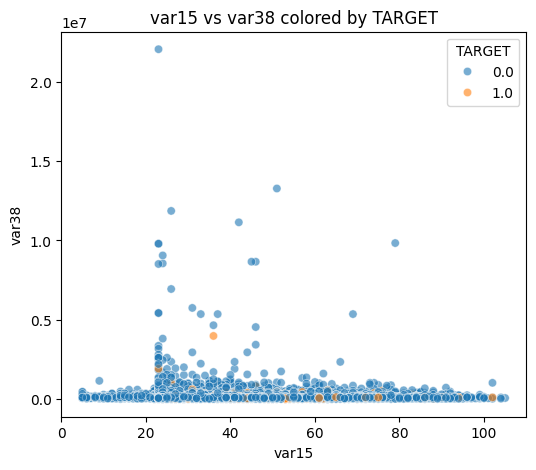

Group-wise averages of var15 and var38 by TARGET:
            var15          var38
TARGET                          
0.0     32.946406  117959.156918
1.0     39.680519   99678.280590


In [34]:
# ------------------------------------
# 4. var15 & var38 together vs TARGET
# ------------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x="var15", y="var38", hue="TARGET", data=df, alpha=0.6)
plt.title("var15 vs var38 colored by TARGET")
plt.show()

print("Group-wise averages of var15 and var38 by TARGET:")
print(df.groupby("TARGET")[["var15", "var38"]].mean())

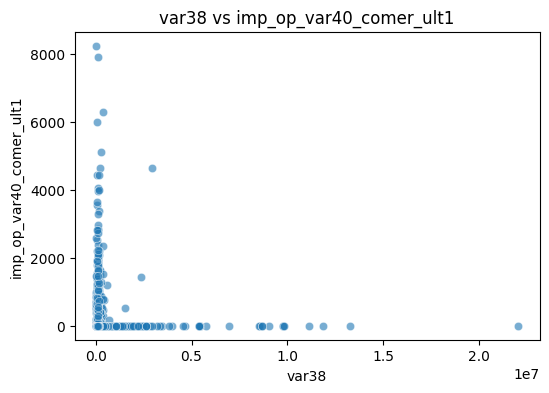

In [35]:
# -----------------------------------
# 5. var38 vs imp_op_var40_comer_ult1
# -----------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="var38", y="imp_op_var40_comer_ult1", data=df, alpha=0.6)
plt.title("var38 vs imp_op_var40_comer_ult1")
plt.show()

In [36]:
# G.
print("Unique categories in TARGET:", df["TARGET"].unique())

# Count frequency of each TARGET class
target_counts = df["TARGET"].value_counts()
print("\nTARGET value counts:")
print(target_counts)

# Percentage distribution
print("\nPercentage distribution:")
print((target_counts / len(df)) * 100)

Unique categories in TARGET: [0. 1.]

TARGET value counts:
TARGET
0.0    73012
1.0     3008
Name: count, dtype: int64

Percentage distribution:
TARGET
0.0    96.043147
1.0     3.956853
Name: count, dtype: float64


This shows that the dataset is highly imbalanced, as the majority of observations belong to class 0 while class 1 makes up less than 4% of the data.

Before upsampling:
Majority class (0): (73012, 371)
Minority class (1): (3008, 371)

After upsampling:
TARGET
0.0    73012
1.0    73012
Name: count, dtype: int64


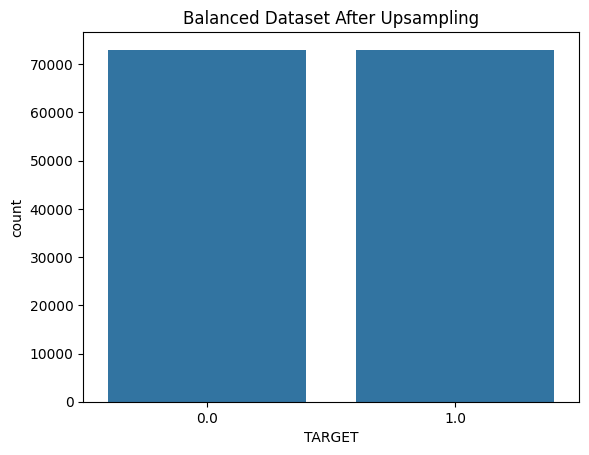

In [37]:
# H.
df_majority = df[df.TARGET == 0]
df_minority = df[df.TARGET == 1]

print("Before upsampling:")
print("Majority class (0):", df_majority.shape)
print("Minority class (1):", df_minority.shape)

# Upsample minority class
df_minority_upsampled = resample(
    df_minority, 
    replace=True,                     # sample with replacement
    n_samples=len(df_majority),       # match majority class size
    random_state=42                   # reproducibility
)

# Combine majority class with upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("\nAfter upsampling:")
print(df_balanced["TARGET"].value_counts())

# Visualize class distribution after balancing
sns.countplot(x="TARGET", data=df_balanced)
plt.title("Balanced Dataset After Upsampling")
plt.show()

In [38]:
# I.
print("Total records:", df_balanced.shape[0])
print("Total features:", df_balanced.shape[1])

# correlation matrix
corr_matrix = df_balanced.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# features with correlation > 65%
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

print("\nFeatures to drop:")
print(to_drop)

# Drop them
df_pearson_selected = df_balanced.drop(columns=to_drop)
print("\nRemaining features after Pearson selection:", df_pearson_selected.shape[1])

Total records: 146024
Total features: 371

Features to drop:
['imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13_medio', 'ind_var13', 'ind_var17', 'ind_var18', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_0', 'ind_var32', 'ind_var33', 'ind_var34', 'ind_var37_0', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_0', 'n

In [39]:
# J.
df_copy = df_balanced.copy()

X = df_copy.drop(columns=["TARGET", "ID"])  # drop target + ID (non-feature)
y = df_copy["TARGET"]

# Scale features to non negative for chi2
X_scaled = MinMaxScaler().fit_transform(X)

# Select top 20 features
selector = SelectKBest(score_func=chi2, k=20)
X_new = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Selected features by Chi-Square test:")
print(selected_features)

Selected features by Chi-Square test:
Index(['ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0',
       'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24_0',
       'ind_var24', 'ind_var30', 'num_var5', 'num_var13_corto_0',
       'num_var13_corto', 'num_var30', 'num_var42', 'var36',
       'num_meses_var5_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3'],
      dtype='object')
